![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [83]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

df = insurance

In [84]:
# Implement model creation and training here
# Use as many cells as you need

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


# Cleaning data

In [85]:
# Drop NA and Null values in any row
df = df.dropna()

# The column 'age' might have negative values, instead of removing them, I convert them to positive.
df.loc[:, "age"] = df["age"].abs()

# Standarize the 'sex' column
df.loc[:,'sex'] = df['sex'].str.lower().str[0]
df.loc[df['sex'] == 'w', 'sex'] = 'f'

# The column does not show problems

# The column 'children' might have negative values, instead of removing them, I convert them to positive.
df.loc[:, 'children'] = df['children'].abs()

# Just one letter for the smoker
df.loc[:, 'smoker'] = df['smoker'].str.lower().str[0]

# Just capital letters for 'region'
df.loc[:, 'region'] = df['region'].str.lower()

# Standarize charges
# Clean column first
df.loc[:, 'charges'] = (
    df['charges']
    .astype(str)
    .str.replace(r'[^\d.,-]', '', regex=True)
    .str.replace(',', '.', regex=False)
    .replace('', np.nan)  # convert empty strings to NaN
)

# Now drop rows where 'charges' is NaN
df = df.dropna(subset=['charges'])

# Finally, convert to float
df.loc[:, 'charges'] = df['charges'].astype(float)

df

,age,sex,bmi,children,smoker,region,charges
0,19.0,f,27.900,0.0,y,southwest,16884.924
1,18.0,m,33.770,1.0,n,southeast,1725.5523
2,28.0,m,33.000,3.0,n,southeast,4449.462
3,33.0,m,22.705,0.0,n,northwest,21984.47061
4,32.0,m,28.880,0.0,n,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50.0,m,30.970,3.0,n,northwest,10600.5483
1334,18.0,f,31.920,0.0,n,northeast,2205.9808
1335,18.0,f,36.850,0.0,n,southeast,1629.8335
1336,21.0,f,25.800,0.0,n,southwest,2007.945


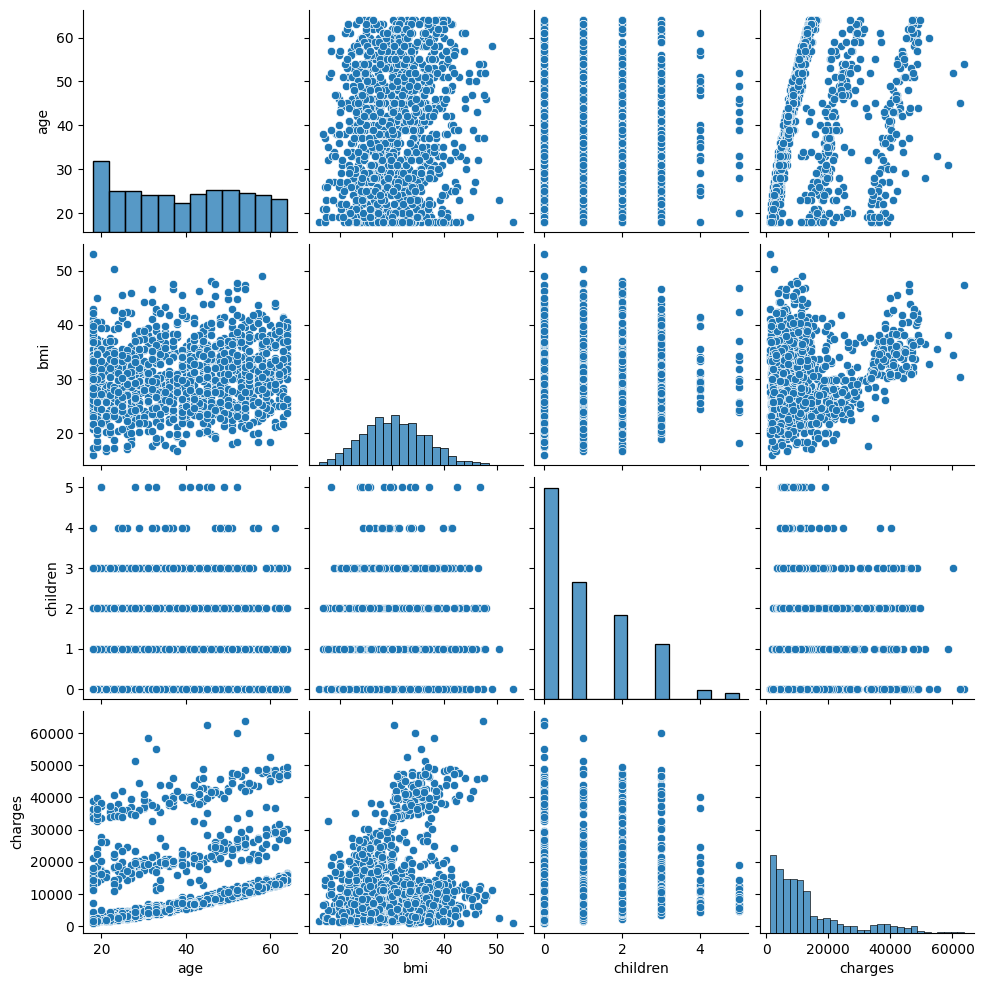

In [86]:
# Numerical data plot
sns.pairplot(df)

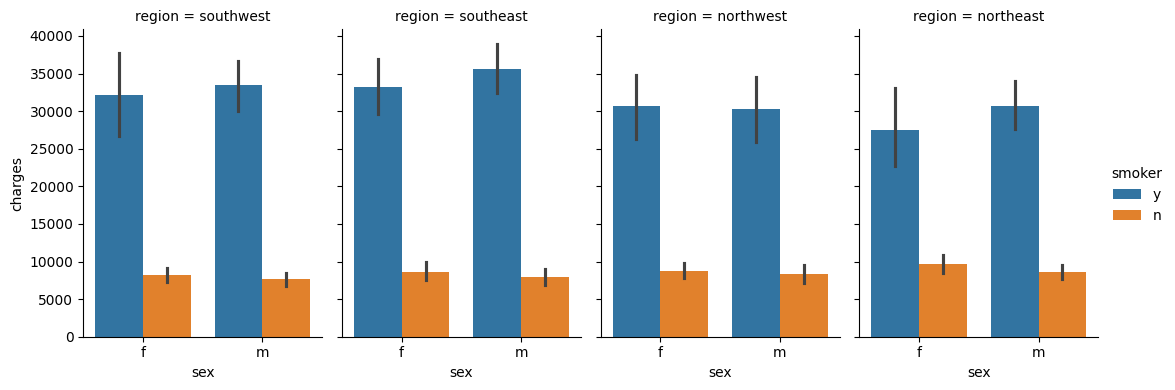

In [87]:
# Categorical data plot
sns.catplot(x="sex",
            y="charges",
            hue="smoker",
            col="region",
            data=df, 
            kind="bar",
            height=4,
            aspect=.7)


# ML: Regression

In [88]:
insurance_valid = pd.read_csv("validation_dataset.csv")
insurance_valid.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [89]:
# Convert training dataset to be similar to the validation dataset
df.loc[df['sex'] == 'f', 'sex'] = 'female'
df.loc[df['sex'] == 'm', 'sex'] = 'male'

df.loc[df['smoker'] == 'y', 'smoker'] = 'yes'
df.loc[df['smoker'] == 'n', 'smoker'] = 'no'

df.head()

# One-hot encode categorical columns
features = df.drop('charges', axis=1)
target = df['charges']

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(features)

In [90]:
# Numpy matrix
X = X_encoded.to_numpy()  # features
y = target.to_numpy()     # target
X.shape, y.shape

((1207, 11), (1207,))

In [91]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


# Outer CV
outer_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=76)
outer_scores = []

# Define candidate alpha values
alpha_grid = np.logspace(-4, 2, 20)  # From 1e-4 to 1e2

for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Inner loop: Grid search over alphas
    best_score_val = -np.inf
    best_alpha = None

    for alpha_i in alpha_grid:
        model = Ridge(alpha=alpha_i)
        inner_cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42)
        scores_val = cross_val_score(model, X_train, y_train, cv=inner_cv, scoring='r2')
        mean_score_val = np.mean(scores_val)

        if mean_score_val > best_score_val:
            best_score_val = mean_score_val
            best_alpha = alpha_i

    # Train final model with best alpha on outer training set
    final_model = Ridge(alpha=best_alpha)
    final_model.fit(X_train, y_train)

    # Evaluate on outer test set
    y_pred = final_model.predict(X_test)
    r2_val = r2_score(y_test, y_pred)
    outer_scores.append(r2_val)

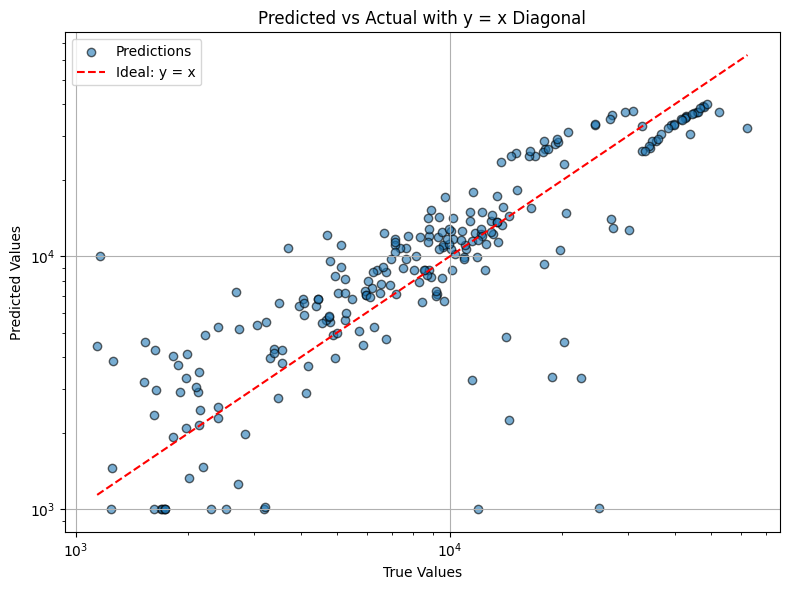

In [92]:
y_test = np.array(y_test).astype(float).ravel()
y_pred = np.array(y_pred).astype(float).ravel()

# Minimum fare of 1000
y_pred = np.where(y_pred < 1000, 1000, y_pred)

# Plot predicted over true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal: y = x')

# Set log scale
plt.xscale('log')
plt.yscale('log')

# Labels and formatting
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual with y = x Diagonal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Datacamp validation

In [93]:
print(f"Nested CV R2 scores: {outer_scores}")
print(f"Average R2: {np.mean(outer_scores)}")

Nested CV R2 scores: [0.7624777631136457, 0.7142548142103067, 0.7912914540957849, 0.6566162301889201, 0.7925960473482376, 0.8012864536740087, 0.7081579907238195, 0.7207177447662652, 0.7146956371450985, 0.7243015741378513, 0.7805021813570772, 0.7622653993595035, 0.6792034332956705, 0.6947612043291659, 0.7828721887820768]
Average R2: 0.7390666744351623


In [94]:
insurance_encoded = pd.get_dummies(insurance_valid)
predicted_charge = final_model.predict(insurance_encoded)

validation_data = insurance_valid.copy()
validation_data["predicted_charges"] = predicted_charge
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

c:\Users\U437184\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30761.344129
2,27.0,male,29.150000,0.0,yes,southeast,27358.705134
3,71.0,male,65.502135,13.0,yes,southeast,57062.790599
4,28.0,male,38.060000,0.0,no,southeast,7254.664371
